## Visualization

In [48]:
df.show(5)

+--------------------+-----------+-----+---------+-----------+----------+--------------------+------+
|            Airlines|Total_Stops|Price| Duration|Destination|      Date|       Airlines_list|Depart|
+--------------------+-----------+-----+---------+-----------+----------+--------------------+------+
|Plusieurs compagnies|          3|  339|29.333334|    Ostrava|2025-05-20|[Plusieurs compag...| Tunis|
|    Turkish Airlines|          1|  308| 9.666667|      Alger|2025-06-09|  [Turkish Airlines]| Tunis|
|Plusieurs compagnies|          2|  288|    27.25|    Ostrava|2025-06-19|[Plusieurs compag...| Tunis|
|  Tunisair, Egyptair|          2|  637|28.083334|  N'Djamena|2025-06-19|[Tunisair, Egyptair]| Tunis|
|Tunisair, ITA Air...|          1|  245|7.6666665| Luxembourg|2025-04-20|[Tunisair, ITA Ai...| Tunis|
+--------------------+-----------+-----+---------+-----------+----------+--------------------+------+
only showing top 5 rows



In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [50]:
# Convert a Dataframe to Pandas for visualization.
df_pandas = df.toPandas()


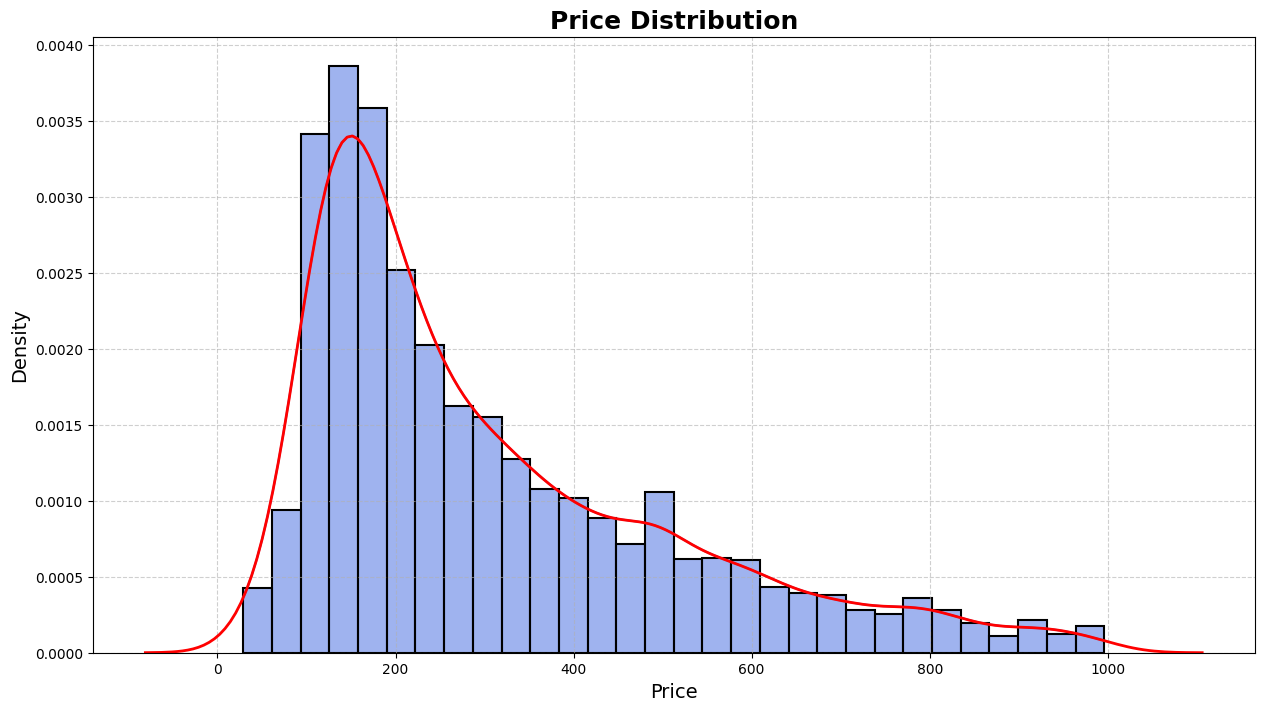

In [51]:
"""
This code visualizes the distribution of data in the Price column. The histogram shows the frequency of different value ranges, while the KDE curve offers a smoother estimate of the underlying data distribution. This helps to understand the distribution, central tendencies and variability of prices in the dataset.
"""

plt.figure(figsize=(15, 8))

sns.histplot(df_pandas['Price'], bins=30, kde=True, color='royalblue', stat='density', linewidth=1.5)


plt.title('Price Distribution', fontsize=18, fontweight='bold')
plt.xlabel('Price', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.6)

sns.kdeplot(df_pandas['Price'], color='red', linewidth=2)



plt.show()


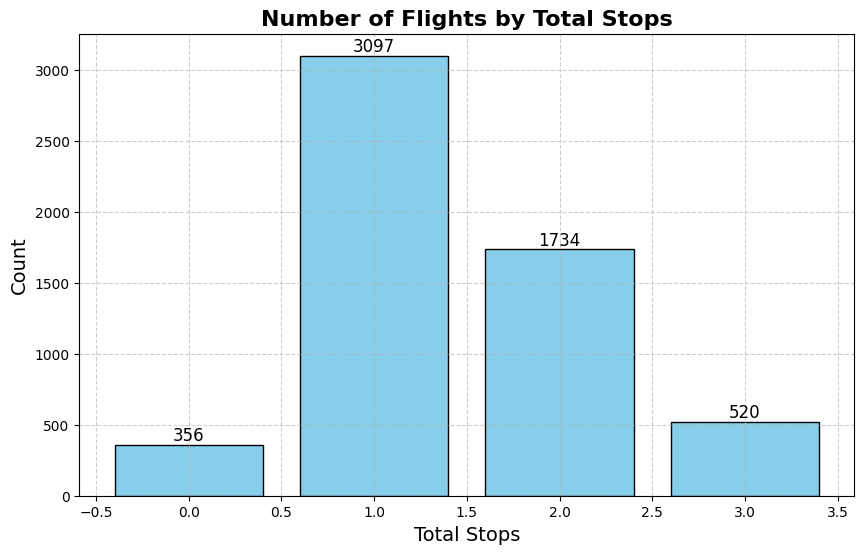

In [52]:
"""
This code shows the distribution of flights according to the number of stops. Each bar represents a stop category (e.g. non-stop, 1 stop), and the height of the bar indicates the total number of flights in that category. Annotations on the bars make the breakdowns easier to read.
"""
stop_counts=df_pandas['Total_Stops'].value_counts()

plt.figure(figsize=(10, 6))
sns.set_palette("Blues")


bars = plt.bar(stop_counts.index, stop_counts.values, color='skyblue', edgecolor='black')

for i,bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,height+2,str(height),ha='center',va='bottom',fontsize=12,color='black')

plt.title('Number of Flights by Total Stops', fontsize=16, fontweight='bold')
plt.xlabel('Total Stops', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

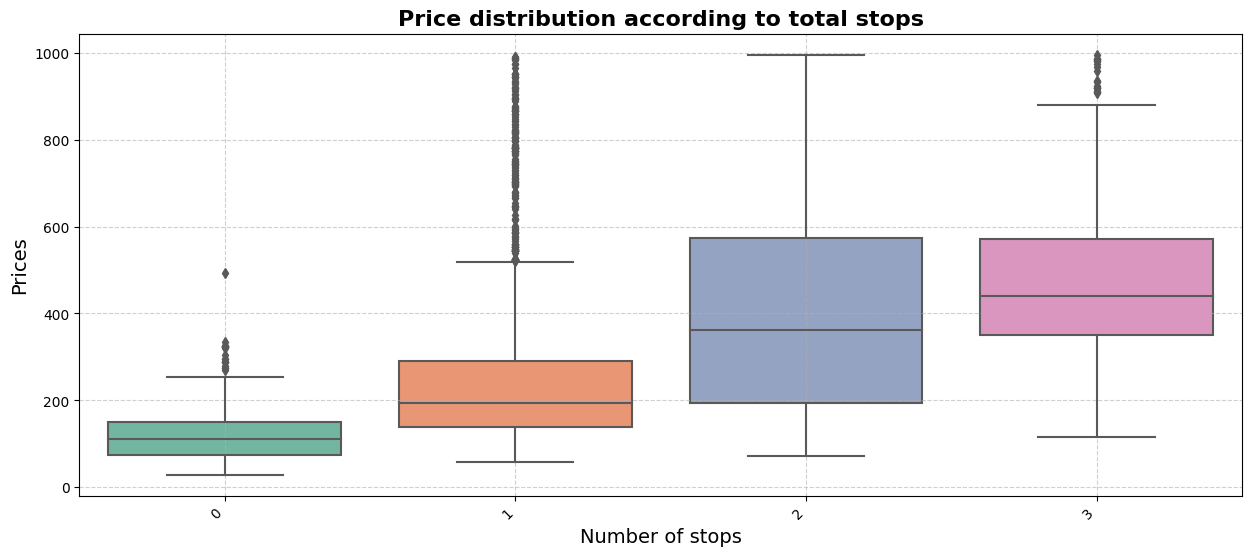

In [53]:
"""
This code helps you understand how ticket prices vary according to the number of stops (e.g. non-stop, 1-stop, etc.). Each box represents a category of stops and highlights price trends, such as:

Minimum, median and maximum prices for each category.
Price dispersion (indicated by box size and whiskers).
Any outliers, which appear as dots outside the whiskers.
This is useful for analyzing whether a greater number of stops is associated with lower prices, or whether prices vary widely within a category.


"""
plt.figure(figsize=(15, 6))

sns.set_palette("Set2")

sns.boxplot(x='Total_Stops', y='Price', data=df_pandas, linewidth=1.5)


plt.title('Price distribution according to total stops', fontsize=16, fontweight='bold')


plt.xlabel('Number of stops', fontsize=14)
plt.ylabel('Prices', fontsize=14)


plt.xticks(rotation=45, ha='right')

plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

So generally speaking, as the number of stops increases, so does the price, but this is generally due to the distance travelled and the resources required.

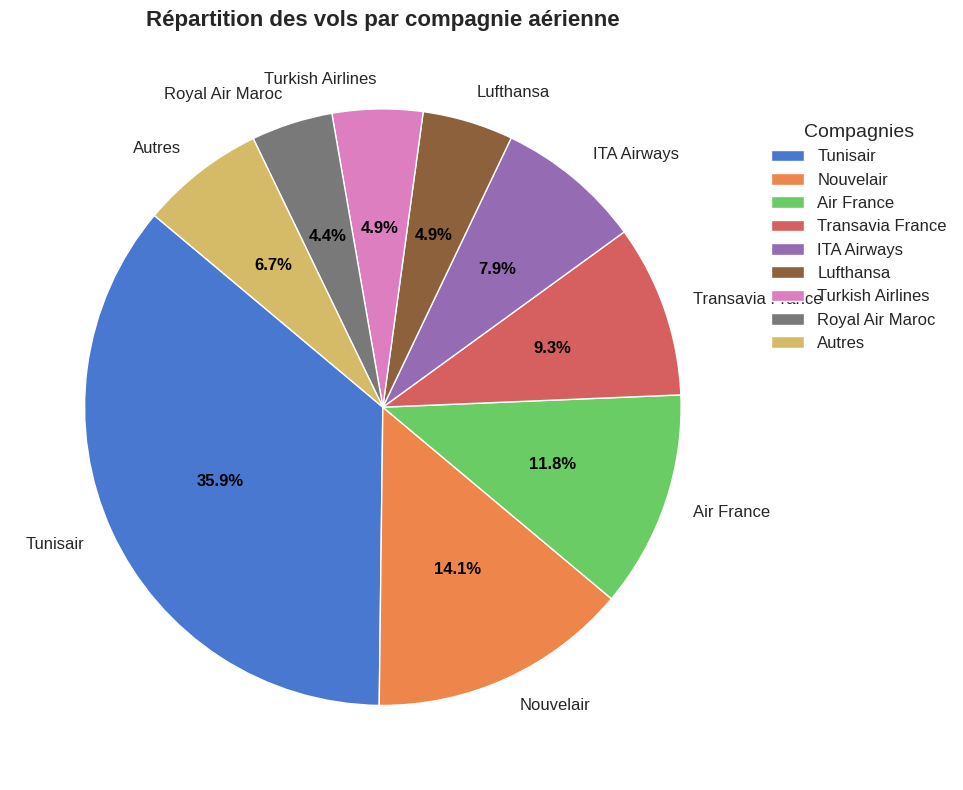

In [ ]:
from collections import Counter


def expand_airlines(airlines_list):
    airline_counts = Counter()
    
    for airline_group in airlines_list:
        if ("," in airline_group):
            temp=airline_group.split(", ")
            for i in temp:
                airline_counts[i] += 1
        else:
            if(airline_group[0]=="Plusieurs compagnies"):
                continue
            else:
                airline_counts[airline_group[0]] += 1


    
    return dict(sorted(airline_counts.items(), key=lambda x: x[1], reverse=True))


airlines = expand_airlines(df_pandas['Airlines_list'])


threshold =150 
airlines_grouped = {key: value for key, value in airlines.items() if value >= threshold}
others = sum(value for key, value in airlines.items() if value < threshold)
if others > 0:
    airlines_grouped["Autres"] = others


labels = list(airlines_grouped.keys())
sizes = list(airlines_grouped.values())
colors = sns.color_palette("muted", len(labels))  

plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors,
    textprops={'fontsize': 12}, 
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}  
)


for autotext in autotexts:
    autotext.set_fontweight('bold')
    autotext.set_color('black')


plt.legend(
    loc='upper left', 
    bbox_to_anchor=(1, 0.9), 
    title='Compagnies', 
    fontsize=12, 
    title_fontsize=14
)


plt.title('Répartition des vols par compagnie aérienne', fontsize=16, fontweight='bold')


plt.tight_layout()


plt.show()


Here we have listed the agencies irrespective of whether they are used for stopovers or not.Tunisair is a principal airline 

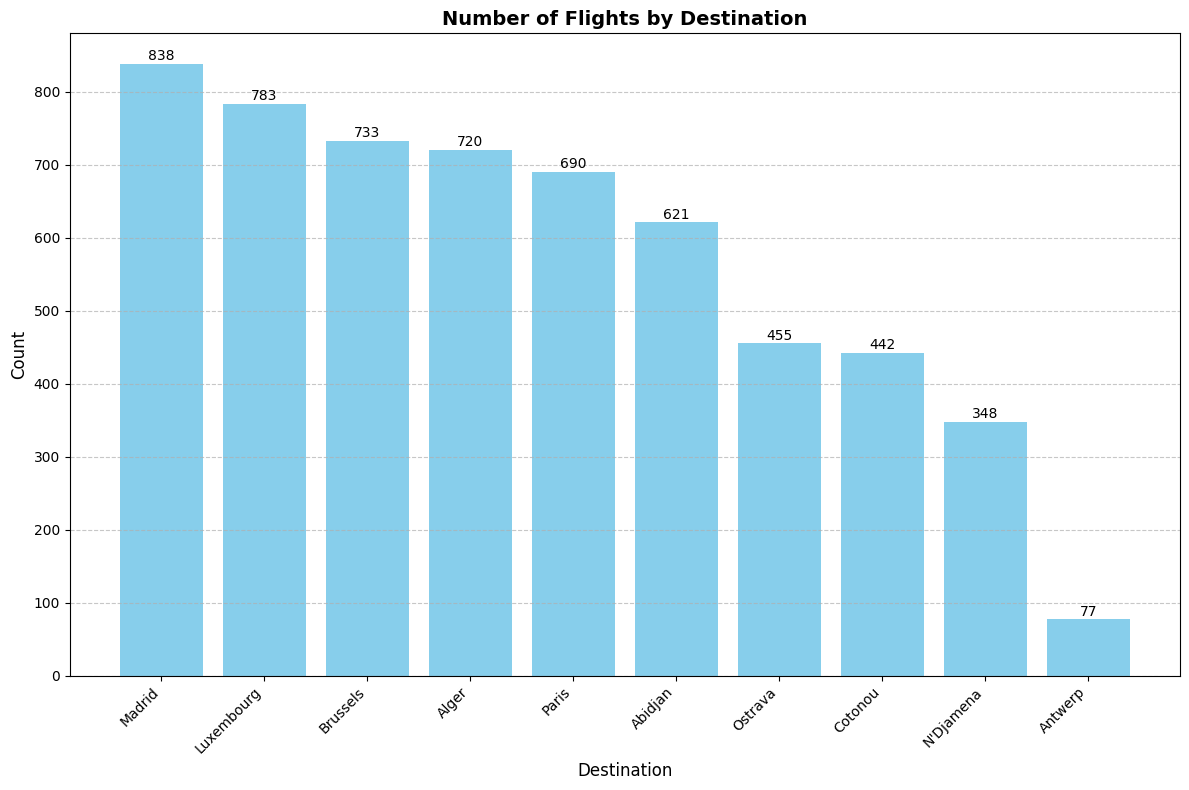

In [67]:
# Nombre de vols par destination
d_2 = df_pandas['Destination'].value_counts().to_dict()
destinations = list(d_2.keys())
values = list(d_2.values())


plt.figure(figsize=(12, 8))  
bars = plt.bar(destinations, values, color='skyblue')


for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,  
             str(value), ha='center', va='bottom', fontsize=10)

plt.title('Number of Flights by Destination', fontsize=14, fontweight='bold')
plt.xlabel('Destination', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  
plt.tight_layout() 
plt.grid(axis='y', linestyle='--', alpha=0.7)  

# Affichage
plt.show()


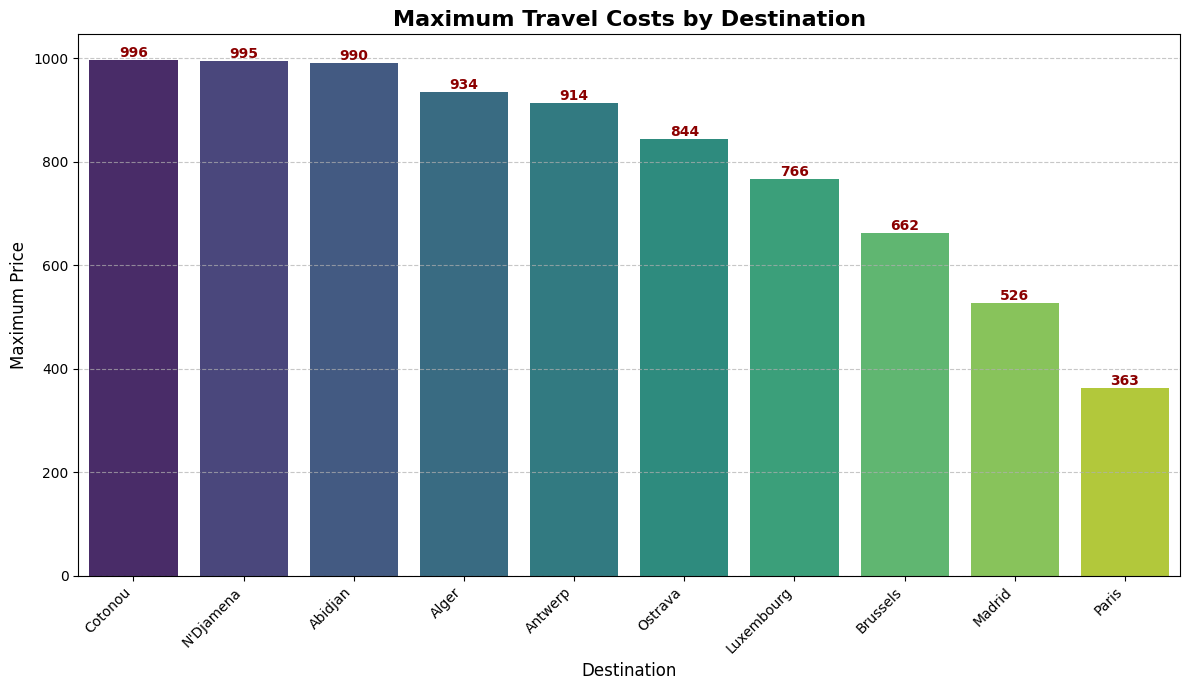

In [68]:

# Max price by destination
def get_max_prices(df):
    return df.groupby('Destination')['Price'].max().sort_values(ascending=False)


max_prices = get_max_prices(df_pandas)

# Création du graphique avec Seaborn pour un style plus élégant
plt.figure(figsize=(12, 7))
sns.barplot(x=max_prices.index, y=max_prices.values, palette='viridis')

# Personnalisation du graphique
plt.title('Maximum Travel Costs by Destination', fontsize=16, fontweight='bold')
plt.xlabel('Destination', fontsize=12)
plt.ylabel('Maximum Price', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Ajout des étiquettes de prix sur les barres
for i, price in enumerate(max_prices.values):
    plt.text(i, price, f'{price:,.0f}', 
             ha='center', va='bottom', 
             fontweight='bold', 
             color='darkred')


plt.tight_layout()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

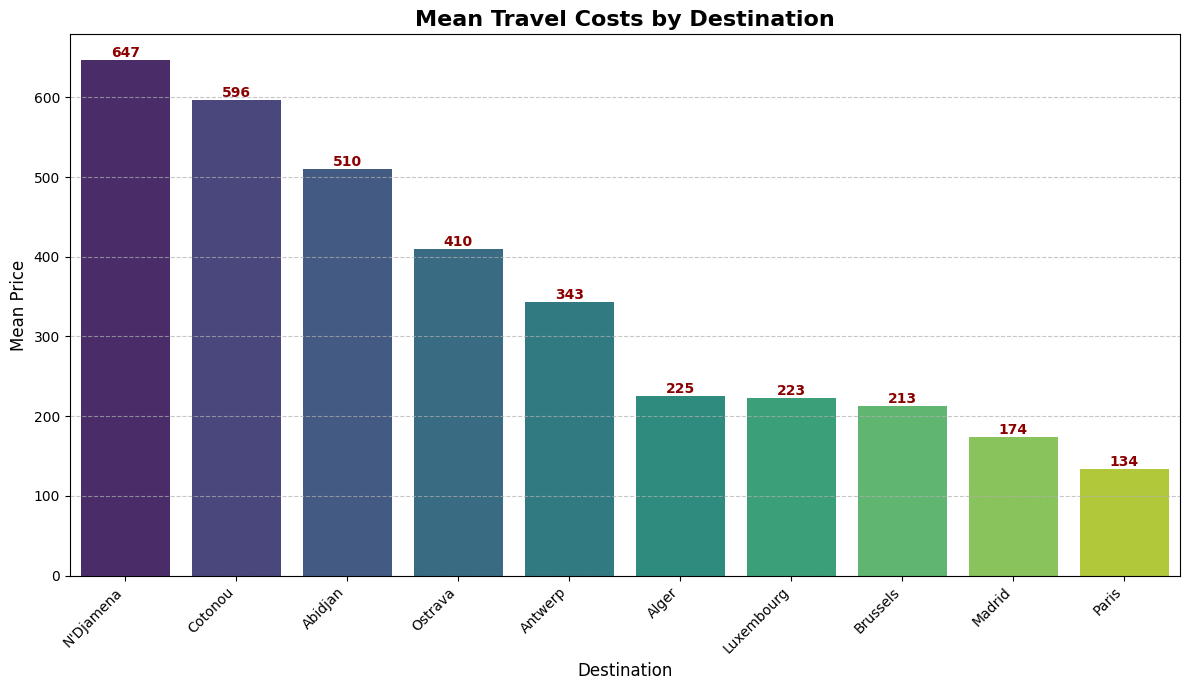

In [ ]:
def get_means_prices(df):
    return df.groupby('Destination')['Price'].mean().sort_values(ascending=False)


mean_prices = get_means_prices(df_pandas)


plt.figure(figsize=(12, 7))
sns.barplot(x=mean_prices.index, y=mean_prices.values, palette='viridis')

# Personnalisation du graphique
plt.title('Mean Travel Costs by Destination', fontsize=16, fontweight='bold')
plt.xlabel('Destination', fontsize=12)
plt.ylabel('Mean Price', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Ajout des étiquettes de prix sur les barres
for i, price in enumerate(mean_prices.values):
    plt.text(i, price, f'{price:,.0f}', 
             ha='center', va='bottom', 
             fontweight='bold', 
             color='darkred')

plt.tight_layout()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


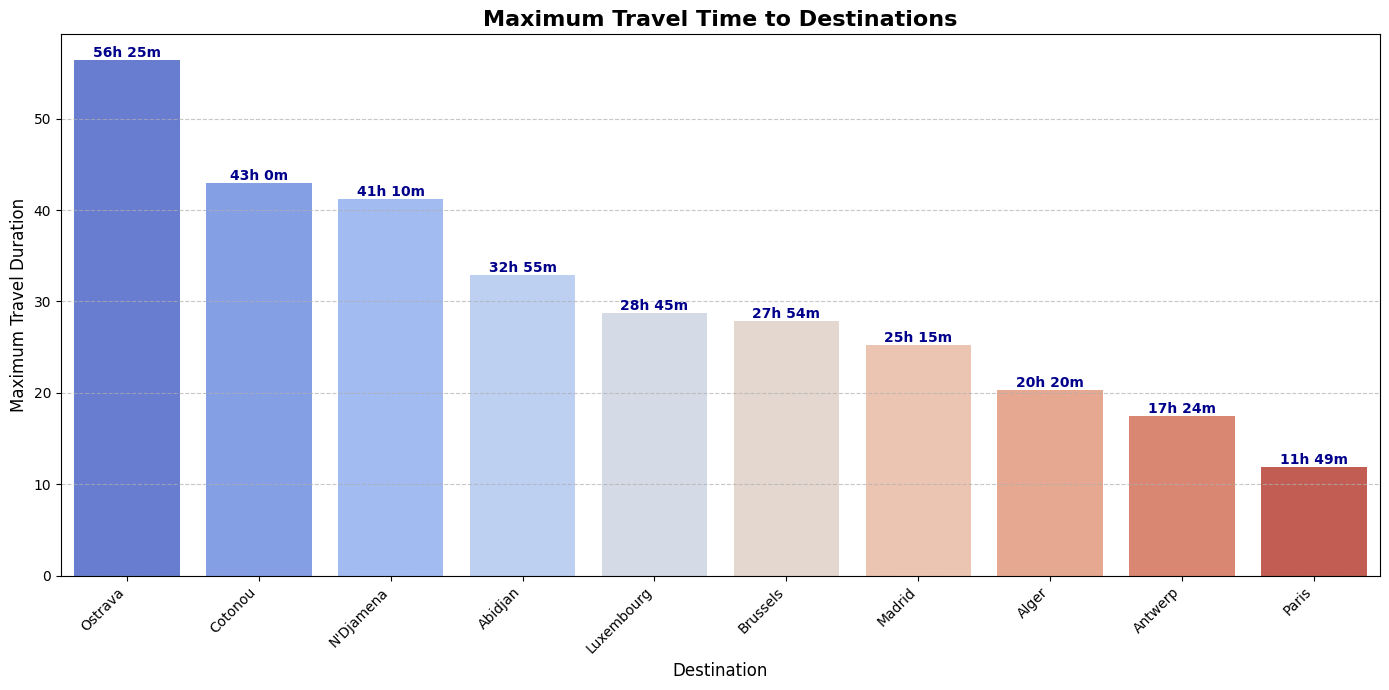

In [58]:
#MAx duration for each destination

def format_duration(hours):
    hour = int(hours)
    mins = int((hours-hour)* 60)
    return f"{hour}h {mins}m"


def get_max_durations(df):
    return df.groupby('Destination')['Duration'].max().sort_values(ascending=False)

max_durations = get_max_durations(df_pandas)

plt.figure(figsize=(14, 7))
bars = sns.barplot(x=max_durations.index, y=max_durations.values, palette='coolwarm')

plt.title('Maximum Travel Time to Destinations', fontsize=16, fontweight='bold')
plt.xlabel('Destination', fontsize=12)
plt.ylabel('Maximum Travel Duration', fontsize=12)
plt.xticks(rotation=45, ha='right')

for i, duration in enumerate(max_durations.values):
    formatted_duration = format_duration(duration)
    plt.text(i, duration, formatted_duration, 
             ha='center', va='bottom', 
             fontweight='bold', 
             color='darkblue')

plt.tight_layout()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

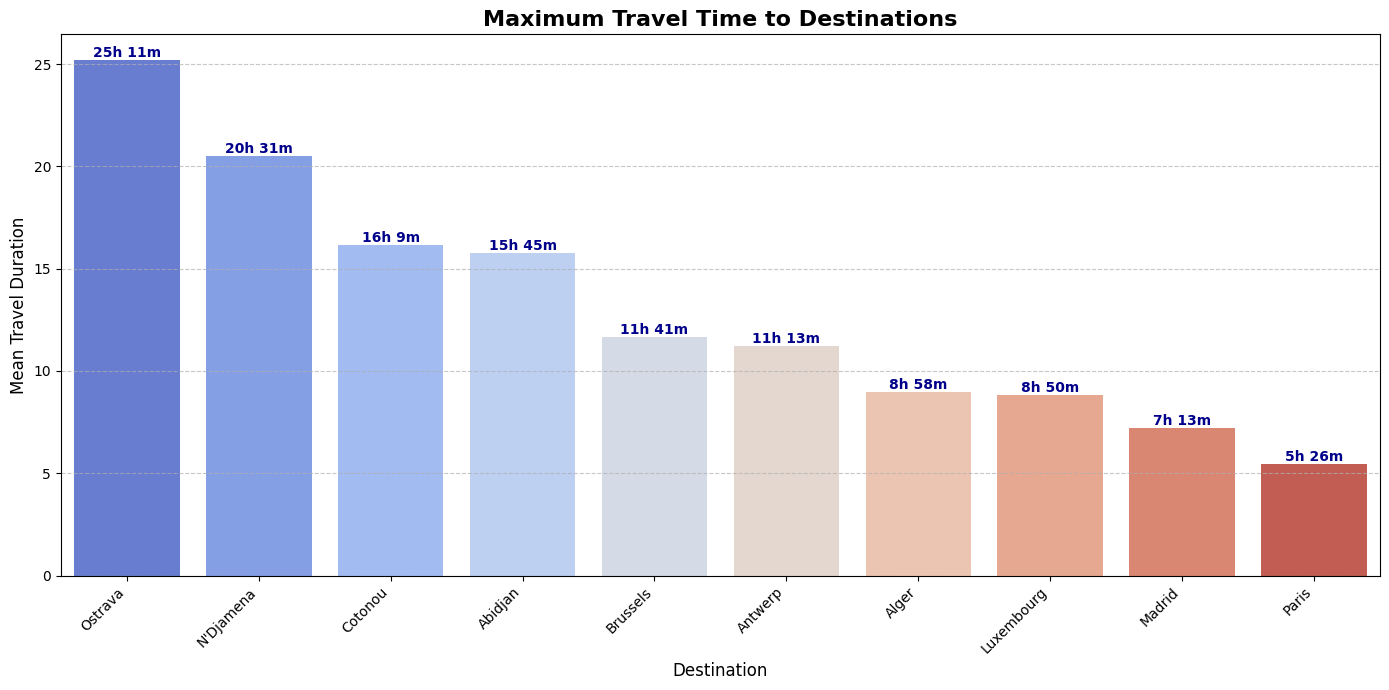

In [75]:
#MAx duration for each destination

def format_duration(hours):
    hour = int(hours)
    mins = int((hours-hour)* 60)
    return f"{hour}h {mins}m"


def get_mean_durations(df):
    return df.groupby('Destination')['Duration'].mean().sort_values(ascending=False)

mean_durations = get_mean_durations(df_pandas)

plt.figure(figsize=(14, 7))
bars = sns.barplot(x=mean_durations.index, y=mean_durations.values, palette='coolwarm')

plt.title('Maximum Travel Time to Destinations', fontsize=16, fontweight='bold')
plt.xlabel('Destination', fontsize=12)
plt.ylabel('Mean Travel Duration', fontsize=12)
plt.xticks(rotation=45, ha='right')

for i, duration in enumerate(mean_durations.values):
    formatted_duration = format_duration(duration)
    plt.text(i, duration, formatted_duration, 
             ha='center', va='bottom', 
             fontweight='bold', 
             color='darkblue')

plt.tight_layout()

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Figure size 1000x600 with 0 Axes>

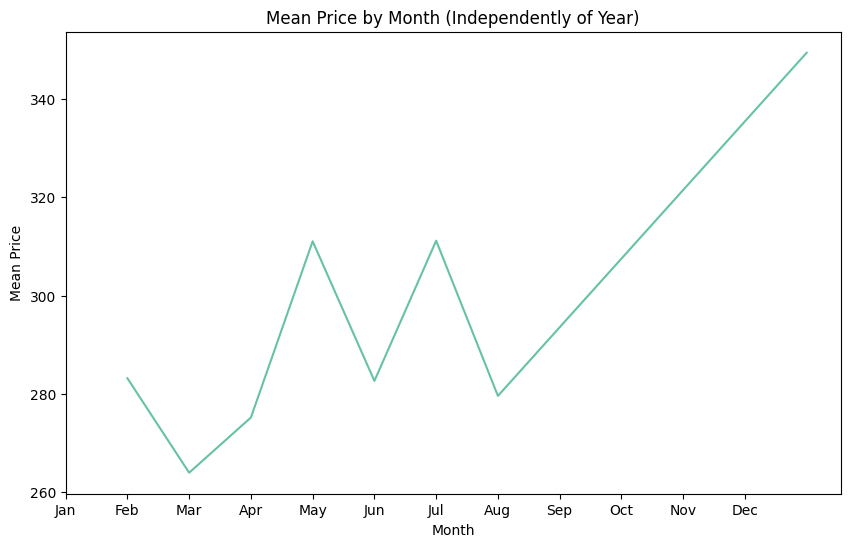

In [78]:
#Means of prices

plt.figure(figsize=(10, 6))
df_pandas['Date'] = pd.to_datetime(df_pandas['Date'])

df_pandas["Month"] = df_pandas["Date"].dt.month

# Calculer le prix moyen par mois
monthly_prices = df_pandas.groupby("Month")["Price"].mean()

# Tracer le graphique
plt.figure(figsize=(10, 6))
monthly_prices.plot()

plt.xlabel("Month")
plt.ylabel("Mean Price")
plt.title("Mean Price by Month (Independently of Year)")
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

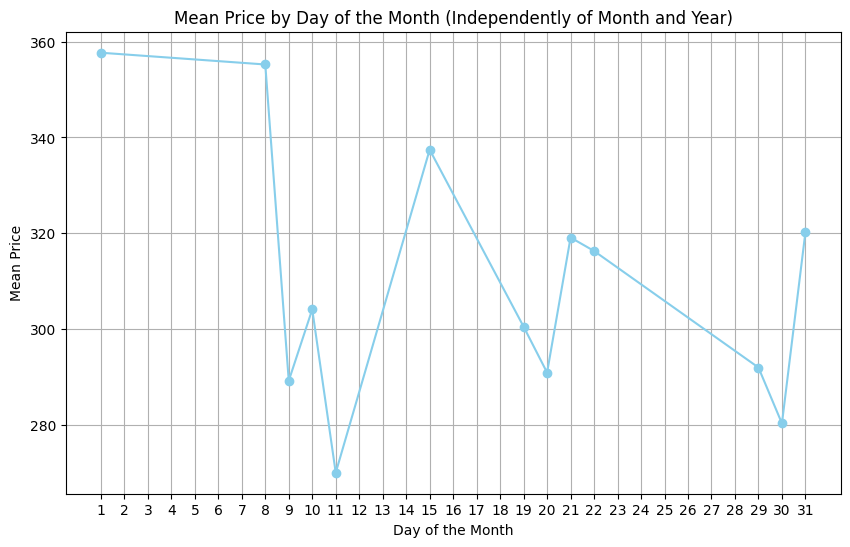

In [79]:



df_pandas["Day"] = df_pandas["Date"].dt.day


daily_prices = df_pandas.groupby("Day")["Price"].mean()

plt.figure(figsize=(10, 6))
daily_prices.plot(marker='o', linestyle='-', color='skyblue')

plt.xlabel("Day of the Month")
plt.ylabel("Mean Price")
plt.title("Mean Price by Day of the Month (Independently of Month and Year)")
plt.xticks(ticks=range(1, 32))  
plt.grid(True)
plt.show()


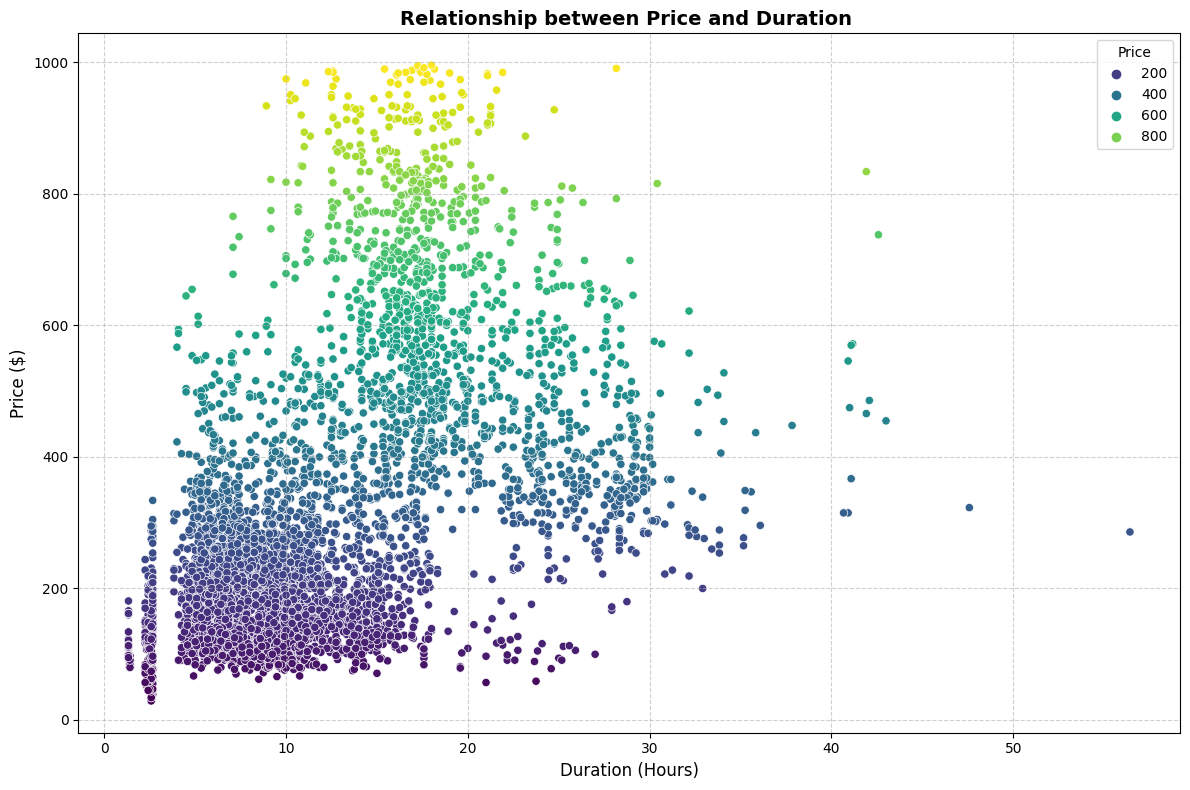

In [81]:
#Relationship between Price and Duration of Hour's

# Création de la figure
plt.figure(figsize=(12, 8))

# Scatterplot amélioré
sns.scatterplot(
    x='Duration', 
    y='Price', 
    data=df_pandas,
    hue='Price',  
    sizes=(20, 200),  
    palette='viridis' 
)


plt.xlabel('Duration (Hours)', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.title('Relationship between Price and Duration ', fontsize=14, fontweight='bold')


plt.grid(True, linestyle='--', alpha=0.6)  
plt.tight_layout()

plt.show()


/tmp/ipykernel_2980/107482528.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<Figure size 4500x2100 with 0 Axes>

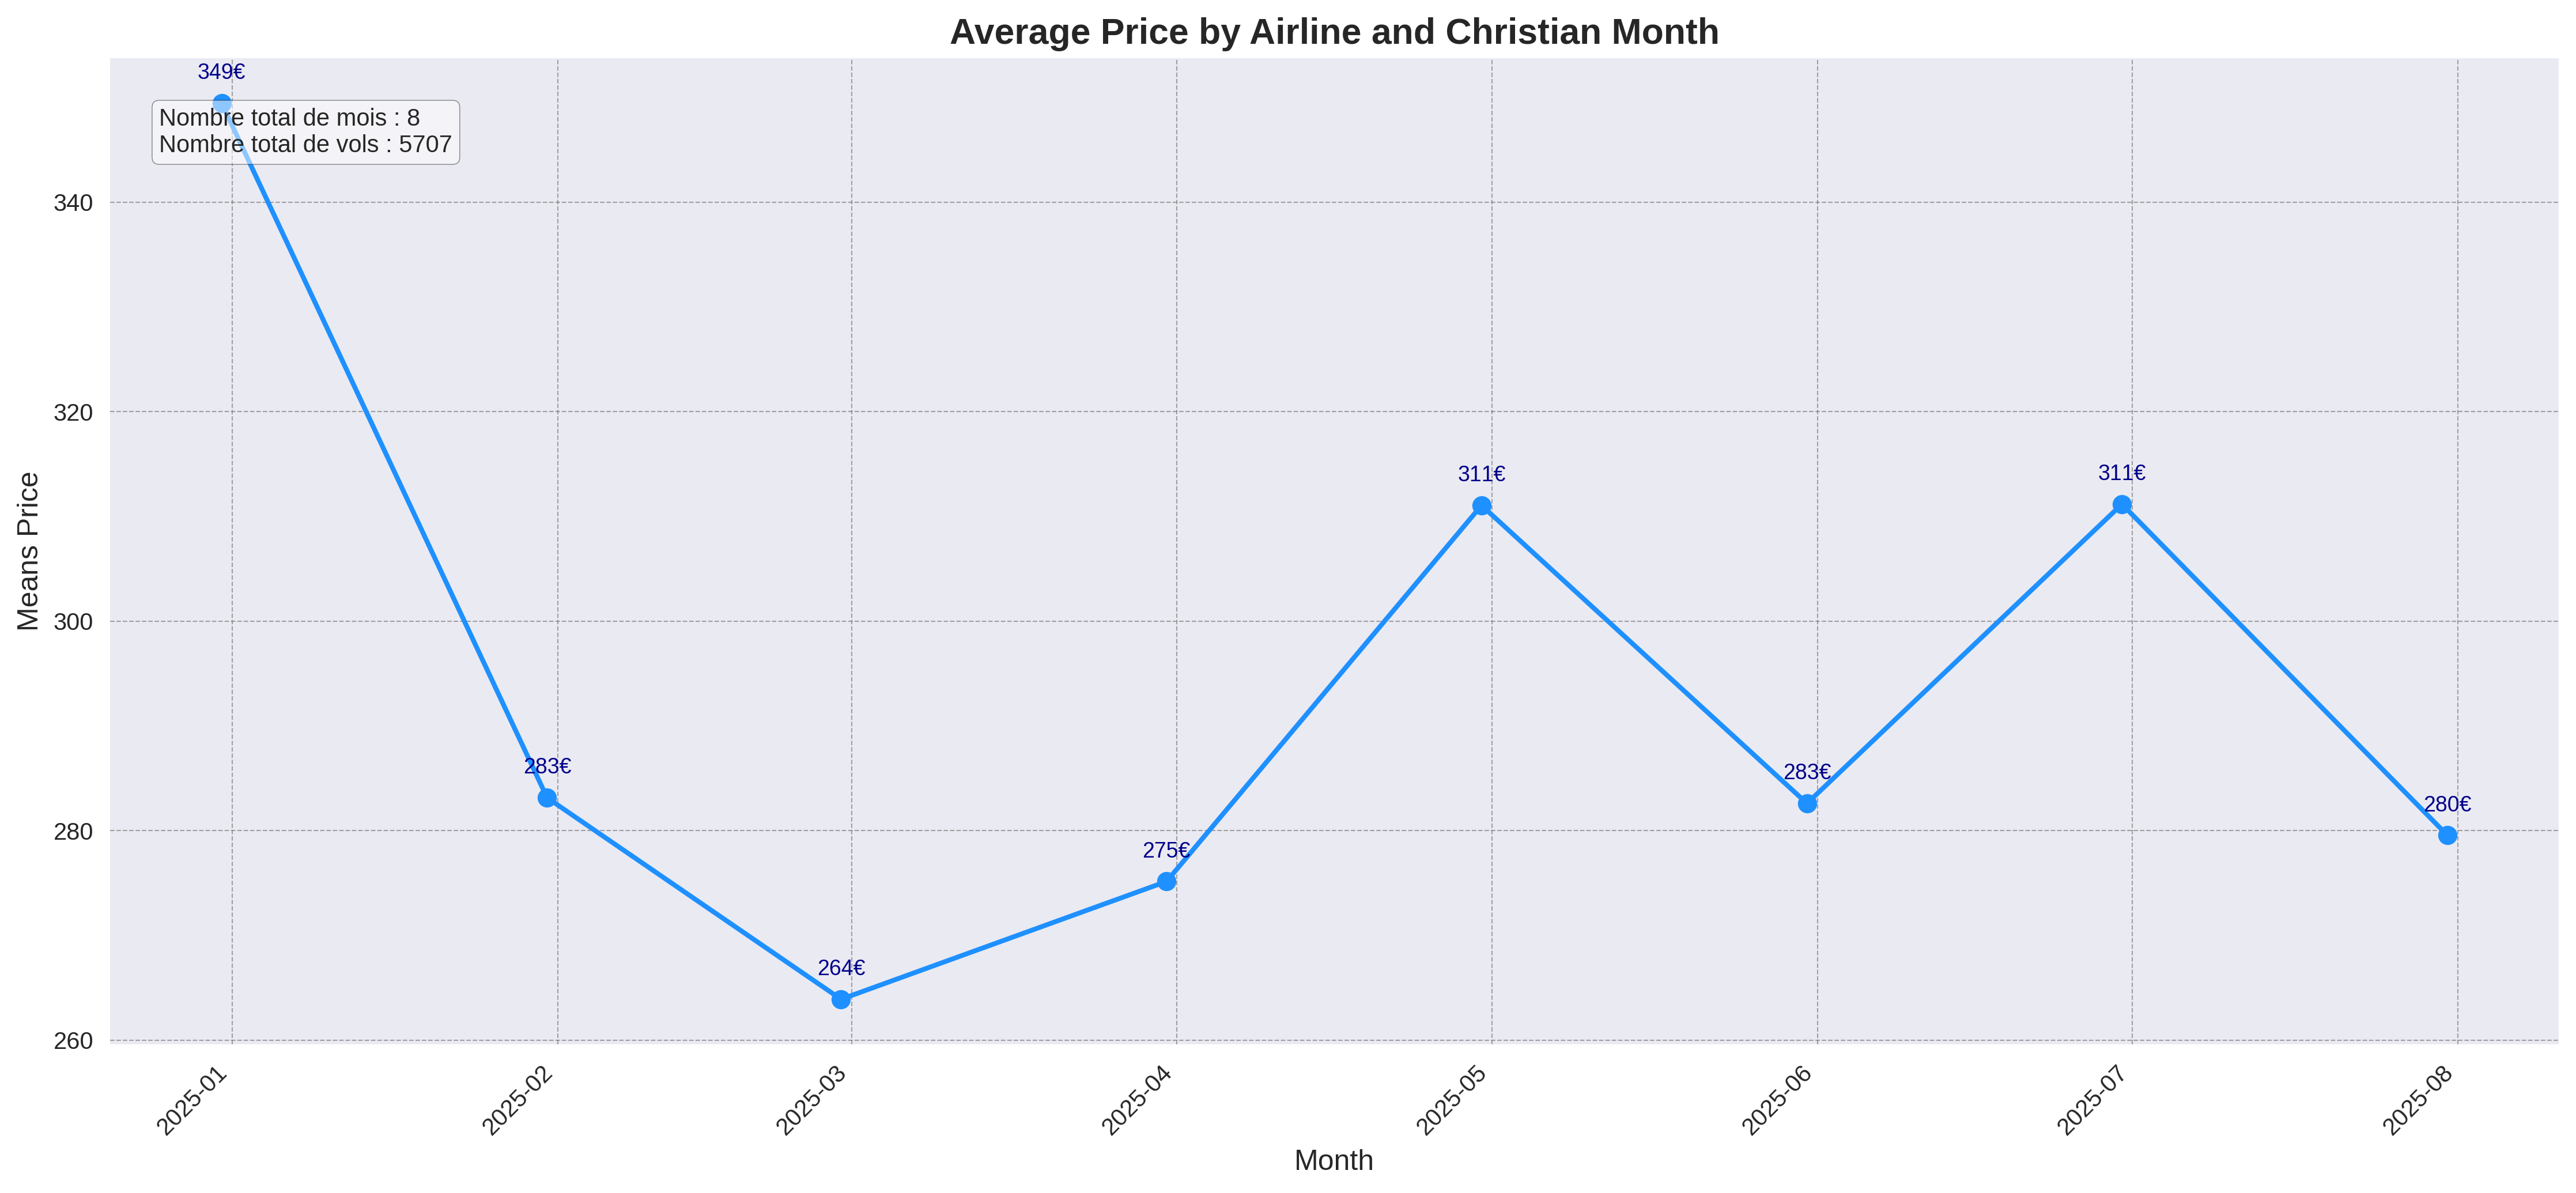

In [82]:
# Average Price by Airline and Christian Month

import matplotlib.dates as mdates


df_pandas["Date"] = pd.to_datetime(df_pandas["Date"], errors='coerce')
df_pandas = df_pandas.dropna(subset=["Date"])


monthly_prices = df_pandas.groupby(pd.Grouper(key="Date", freq="M"))["Price"].agg([
    'mean',     # Prix moyen
    'count'     # Nombre de vols
]).reset_index()


plt.style.use('seaborn')
plt.figure(figsize=(15, 7), dpi=300)


fig, ax = plt.subplots(figsize=(15, 7), dpi=300)


ax.plot(monthly_prices['Date'], monthly_prices['mean'], 
        marker='o', linestyle='-', color='#1E90FF', 
        linewidth=2, markersize=8, label='Prix Moyen Mensuel')


ax.set_xlabel("Month", fontsize=12)
ax.set_ylabel("Means Price", fontsize=12)
ax.set_title("Average Price by Airline and Christian Month", fontsize=15, fontweight='bold')


plt.setp(ax.get_xticklabels(), rotation=45, ha='right')


ax.grid(True, linestyle='--', linewidth=0.5, color='grey', alpha=0.7)


for i, row in monthly_prices.iterrows():
    ax.annotate(f'{row["mean"]:.0f}€', 
                (row['Date'], row['mean']), 
                xytext=(0, 10), 
                textcoords='offset points', 
                ha='center', 
                fontsize=9, 
                color='darkblue')

# Informations additionnelles
plt.text(0.02, 0.95, 
         f"Nombre total de mois : {len(monthly_prices)}\n" +
         f"Nombre total de vols : {monthly_prices['count'].sum()}", 
         transform=ax.transAxes, 
         verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))



plt.tight_layout()
plt.show()

We notice that the months of January, May and July are more expensive, probably because of the higher demand, which corresponds to vacations.

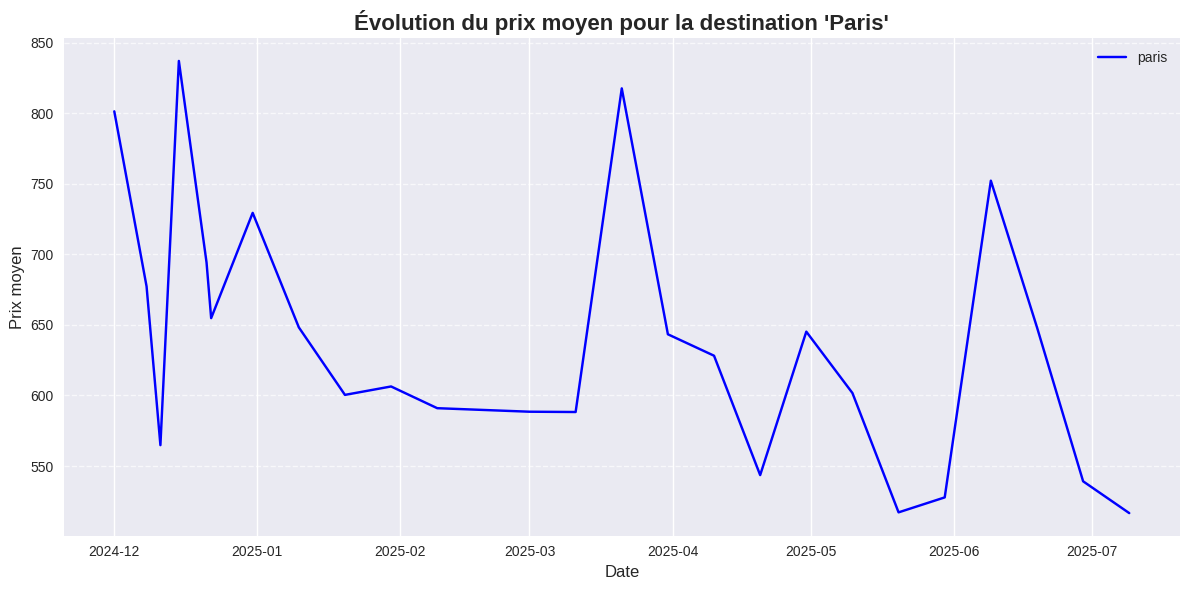

In [ ]:

# Calcul des prix moyens par destination et par date
df_pandas['Date'] = pd.to_datetime(df_pandas['Date'])

# Filtrer les données pour la destination "paris"
paris_data = df_pandas[df_pandas['Destination'] == 'Paris']

# Calcul des prix moyens par date pour "paris"
mean_prices_paris = paris_data.groupby('Date')['Price'].mean().reset_index()

# Création du graphique
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=mean_prices_paris,
    x='Date',
    y='Price',
    color='blue',
    label='paris'
)

# Personnalisation du graphique
plt.title("Évolution du prix moyen pour la destination 'Paris'", fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Prix moyen', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='best')
plt.tight_layout()

# Afficher le graphique
plt.show()